In [42]:
import numpy as np
import json
import warnings
import operator

import h5py
from keras.models import model_from_json
from keras import backend as K

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

size_title = 18
size_label = 14
n_pred = 2 

base_path = "data/analyze_bayesian_opt/" # cluster path: bayesian_opt/similar_galaxy_workflow

path_trials = base_path + "trials.txt"

def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data


trials = read_file(path_trials)
    
l_lr = list()
l_dropout = list()
l_spatial_dropout = list()
l_recurrent_dropout = list()
l_batch_size = list()
l_loss = list()
l_embedding_size = list()
l_units = list()


def create_data(trials_config):
    for k in trials_config:
        item = trials_config[k][0]
        for k_v in item:
            if k_v == 'loss':
                l_loss.append(item[k_v])
            elif k_v == 'params_config':
                config = item[k_v]
                l_dropout.append(config['dropout'][0])
                l_spatial_dropout.append(config['spatial_dropout'][0])
                l_recurrent_dropout.append(config['recurrent_dropout'][0])
                l_batch_size.append(config['batch_size'][0])
                l_embedding_size.append(config['embedding_size'][0])
                l_units.append(config['units'][0])
                l_lr.append(config['learning_rate'][0])

create_data(trials)

In [43]:
def plot_loss_param(x_val, y_val, title, xlabel, ylabel):

    plt.figure(figsize=(8, 8))
    plt.plot(x_val, y_val, 'ro')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

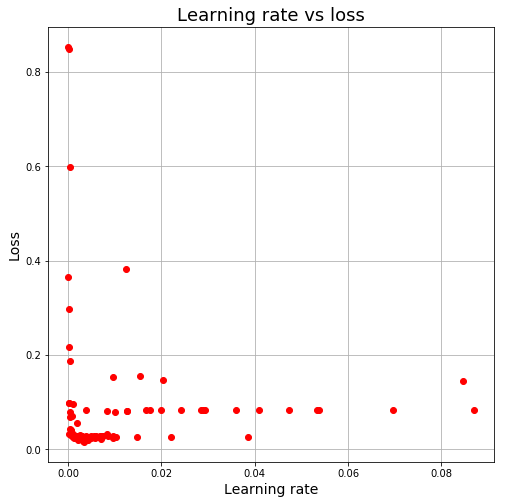

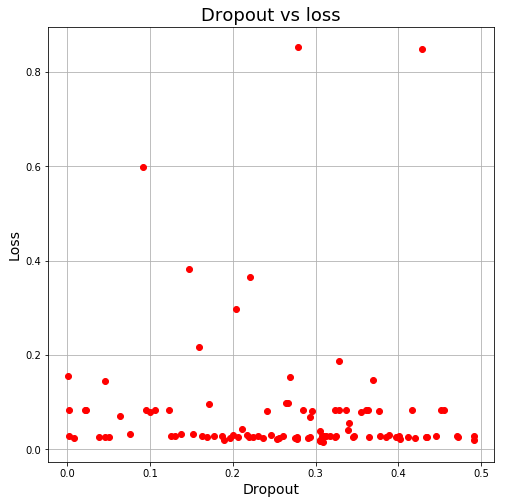

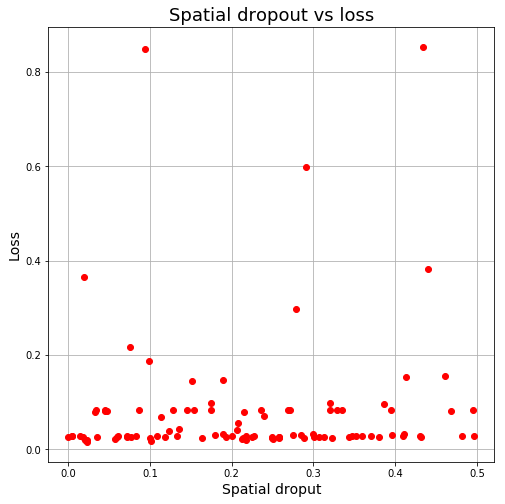

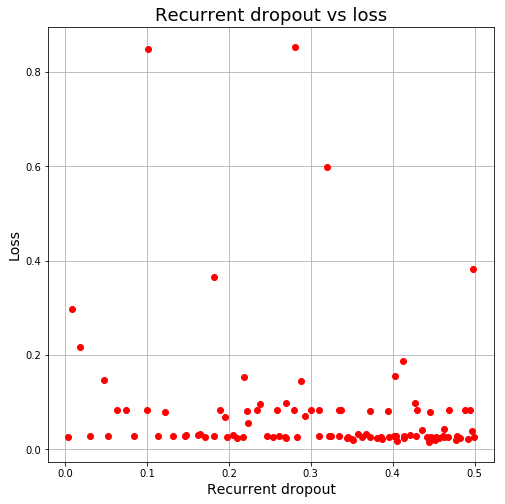

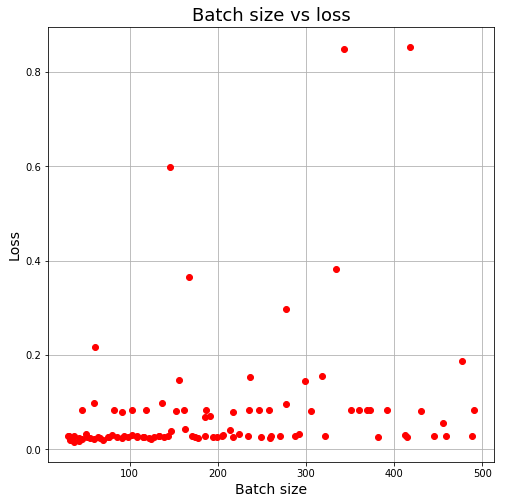

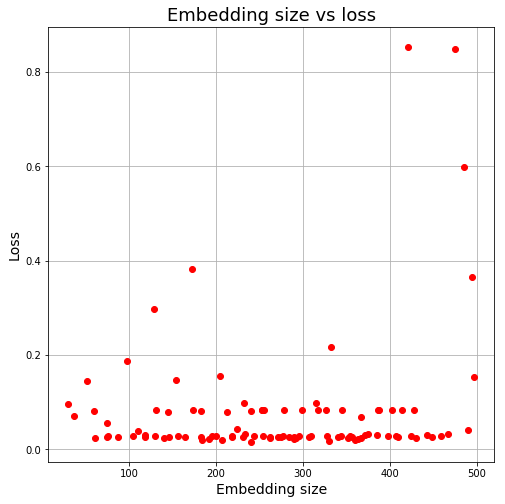

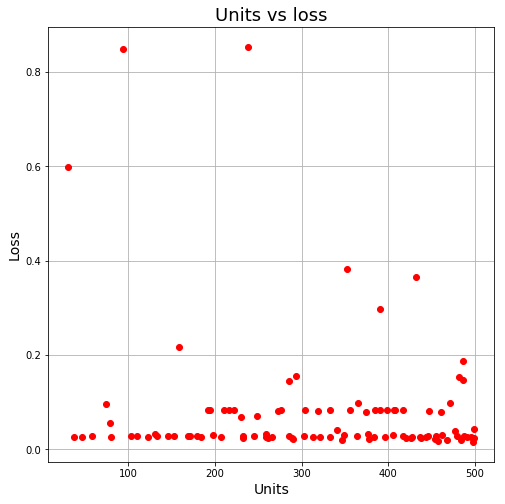

In [44]:
plot_loss_param(l_lr, l_loss, "Learning rate vs loss", "Learning rate", "Loss")
plot_loss_param(l_dropout, l_loss, "Dropout vs loss", "Dropout", "Loss")
plot_loss_param(l_spatial_dropout, l_loss, "Spatial dropout vs loss", "Spatial droput", "Loss")
plot_loss_param(l_recurrent_dropout, l_loss, "Recurrent dropout vs loss", "Recurrent dropout", "Loss")
plot_loss_param(l_batch_size, l_loss, "Batch size vs loss", "Batch size", "Loss")
plot_loss_param(l_embedding_size, l_loss, "Embedding size vs loss", "Embedding size", "Loss")
plot_loss_param(l_units, l_loss, "Units vs loss", "Units", "Loss")